# Online Shoppers Purchasing Intention Dataset

### TO DO

1. A PowerPoint explaining the ins and outs of the problem, your thoughts on the asked question, the different variables you created, how the problem fits in the context of the study, etc: 25%.
2. A code in python: \
a) **Data pre-processing**: encoding, normalization, imputation… 20%. \
b) **Data visualization** (use matplotlib, seaborn, bokeh ...): show the link between the variables and the target: 20%. \
c) **Modeling**: use the scikit-learn library to try several algorithms, change the hyper parameters, do a grid search, compare the results of your models using graphics: 20%
3. Transformation of the model into an API of your choice (Django or flask): 5%.
4. Bonus : 10%

### Due at the end

1. Put your work on your GitHub account:
a) A readme summarizing the task to be accomplished and your conclusions.
b) The pdf version of your PowerPoint.
c) The code in Jupyter notebook format.
d) The Django or Flask API.
2. Put the link to your GitHub on the following page:
https://docs.google.com/spreadsheets/d/1kaQUR8rA9Kbk93ZPM5Blid9pjfM6BZts6I6Odhr8Efc/edit?usp=sharing
3. Send an email to your teacher that you had in class, with:
a) Subject: "ESILV - Python for data analysis - project 2023/2024".
b) Content:
▪ Last name / first name
▪ GitHub link
c) attached file: Ppt (the same as on GitHub).

### Dataset Information
Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.

Additional Information

The dataset consists of feature vectors belonging to 12,330 sessions. 
The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period. 

### Git bash:
- git add file
- git coomit -m "Commentaire"
- git push

## Imports

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Data pre-processing

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")
df.head(20)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

- **"Administrative", "Informational", "ProductRelated"** : number of different types of pages visited by the visitor in that session
- **"Administrative_Duration","Informational_Duration", "ProductRelated_Duration"** : total time spent in each of these page categories
- **"BounceRates"** : refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session
- **"ExitRates"** : For all pageviews to the page, Exit Rate is the percentage that were the last in the session
- **"PageValues"** : represents the average value for a web page that a user visited before completing an e-commerce transaction. This value is intended to give you an idea of which page in your site contributed more to your site's revenue. (float : i.e. $100.5)
- **"SpecialDay"** : indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction.The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.
- **"Month"** : Month of the year
- **"OperatingSystems"** : OS of the visitor (int value)
- **"Browser"** : Browser of the visitor (int value)
- **"Region"** : the region of the started session
- **"TrafficType"** : ?
- **"VisitorType"** : 'New Visitor', 'Returning Visitor' and 'Other'
- **"Weekend"** : boolean value indicates whether the date of the visit is weekend
- **"Revenue"** : boolean value indicates whether the visit has been finalized by a transaction

**"BounceRates", "ExitRates" and "PageValues"** features represent the metrics measured by "Google Analytics" for each page in the e-commerce site, for more details check : 
- https://support.google.com/analytics/answer/2695658?hl=en 
- https://support.google.com/analytics/answer/2525491?hl=en&sjid=10687907467968608279-NC

In [7]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
# J'aurai drop ces colonnes car on ne sait pas à quoi correspondent ces valeurs 
#(j'ai pas reussi à trouver sur internet un tableau qu'on pourrait mapper)
#df = df.drop(columns=['OperatingSystems','Browser','Region','TrafficType'])

Sinon pour la partie pre-processing je pense qu'il faut utiliser sklearn.preprocessing / sklearn.impute pour l'encoding et imputation (cours 4) (on aura surement pas besoin d'utiliser sklearn.impute car on n'a pas de données manquantes). A voir ce qu'il est le plus adapté par rapport à ce qu'on va faire dans la partie modeling
On pourrait encoder VisitorType (?), Revenue et Weekend comme ce sont des boolean

## Data visualization

In [8]:
df.describe(include="object")

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


In [19]:
#DATA_group = df[["Month","VisitorType"]]
#DATA_group

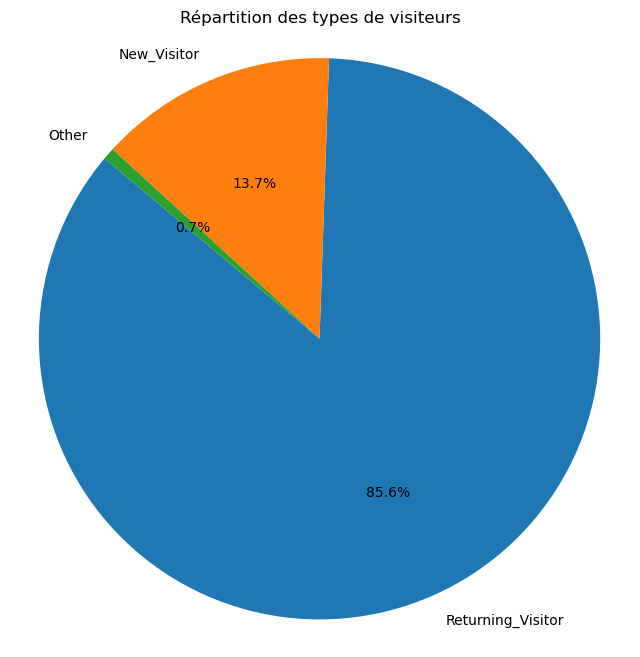

In [25]:
VisitorType_counts = df['VisitorType'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(visitor_type_counts, labels=VisitorType_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Répartition des types de visiteurs')
plt.show()

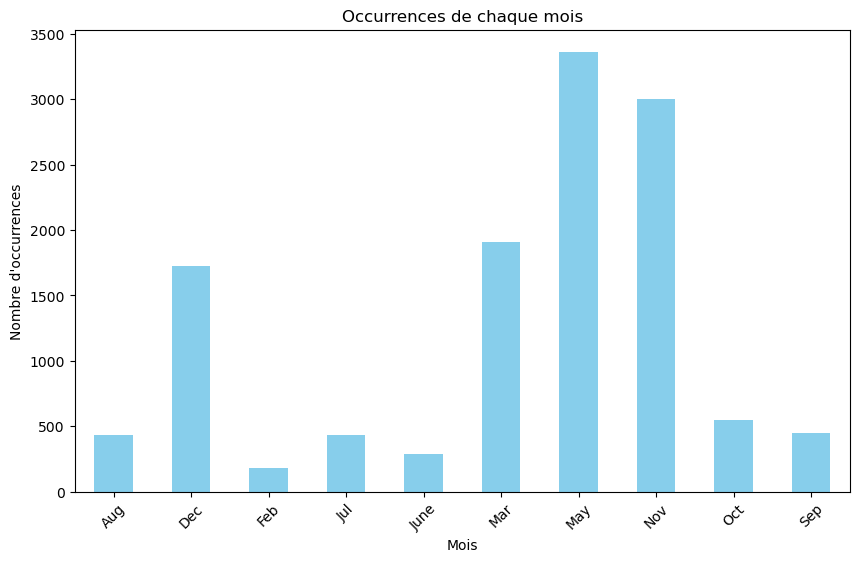

In [31]:
month_counts = df['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
month_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Mois')
plt.ylabel('Nombre d\'occurrences')
plt.title('Occurrences de chaque mois')
plt.xticks(rotation=45)
plt.show()

We can see that 2 months are missing  (January, April)

Later with more information we will probably explain why

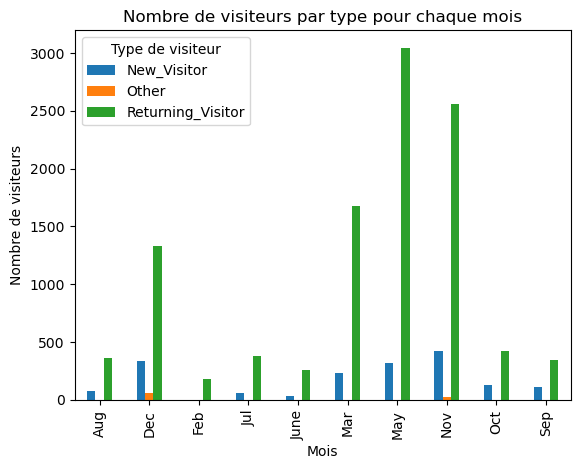

In [12]:
grouped = df.groupby(['Month', 'VisitorType']).size().unstack()

# Tracer le graphique en barres
grouped.plot(kind='bar', stacked=False)
plt.xlabel('Mois')
plt.ylabel('Nombre de visiteurs')
plt.title('Nombre de visiteurs par type pour chaque mois')
plt.legend(title='Type de visiteur')
plt.show()

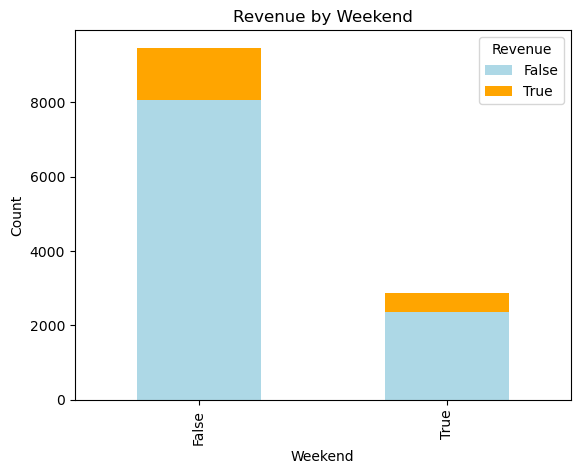

In [50]:
grouped_df = df.groupby(['Weekend','Revenue']).size().unstack()
ax = grouped_df.plot(kind='bar', stacked=True, color=['lightblue', 'orange'])

plt.xlabel('Weekend')
plt.ylabel('Count')
plt.title('Revenue by Weekend')
plt.show()

There are more visits overall that do not result in a transaction, and there is not necessarily a link between the period ( during the week or at the weekend) and transactions

In [52]:
grouped_vt_r_df = df.groupby(['VisitorType','Revenue']).size().unstack()

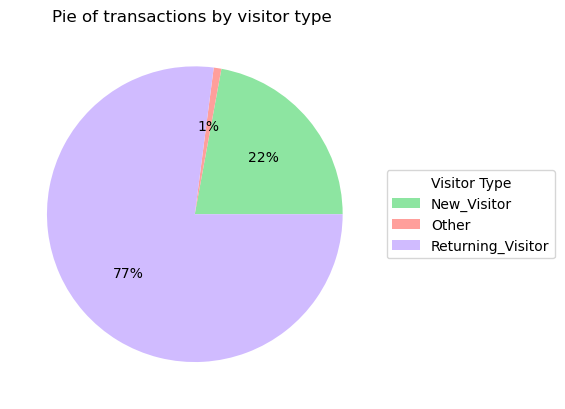

In [53]:
colors = sns.color_palette('pastel')[2:5]

fig, ax = plt.subplots()
wedges,_,_ = ax.pie(grouped_vt_r_df[1], colors = colors, autopct='%.0f%%')
ax.legend(wedges, g.index,
          title="Visitor Type",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title("Pie of transactions by visitor type ")
plt.show()

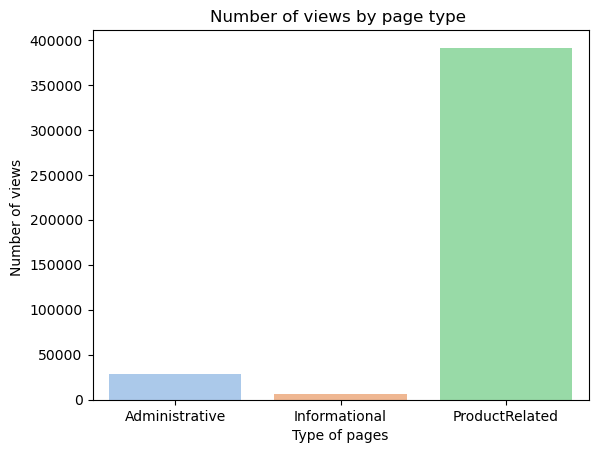

In [100]:
pages_df = df[["Administrative", "Informational", "ProductRelated"]]
sns.barplot(x=pages_df.columns, y=pages_df.sum(axis=0), palette='pastel')
plt.xlabel("Type of pages")
plt.ylabel('Number of views ')
plt.title("Number of views by page type ")
plt.show()

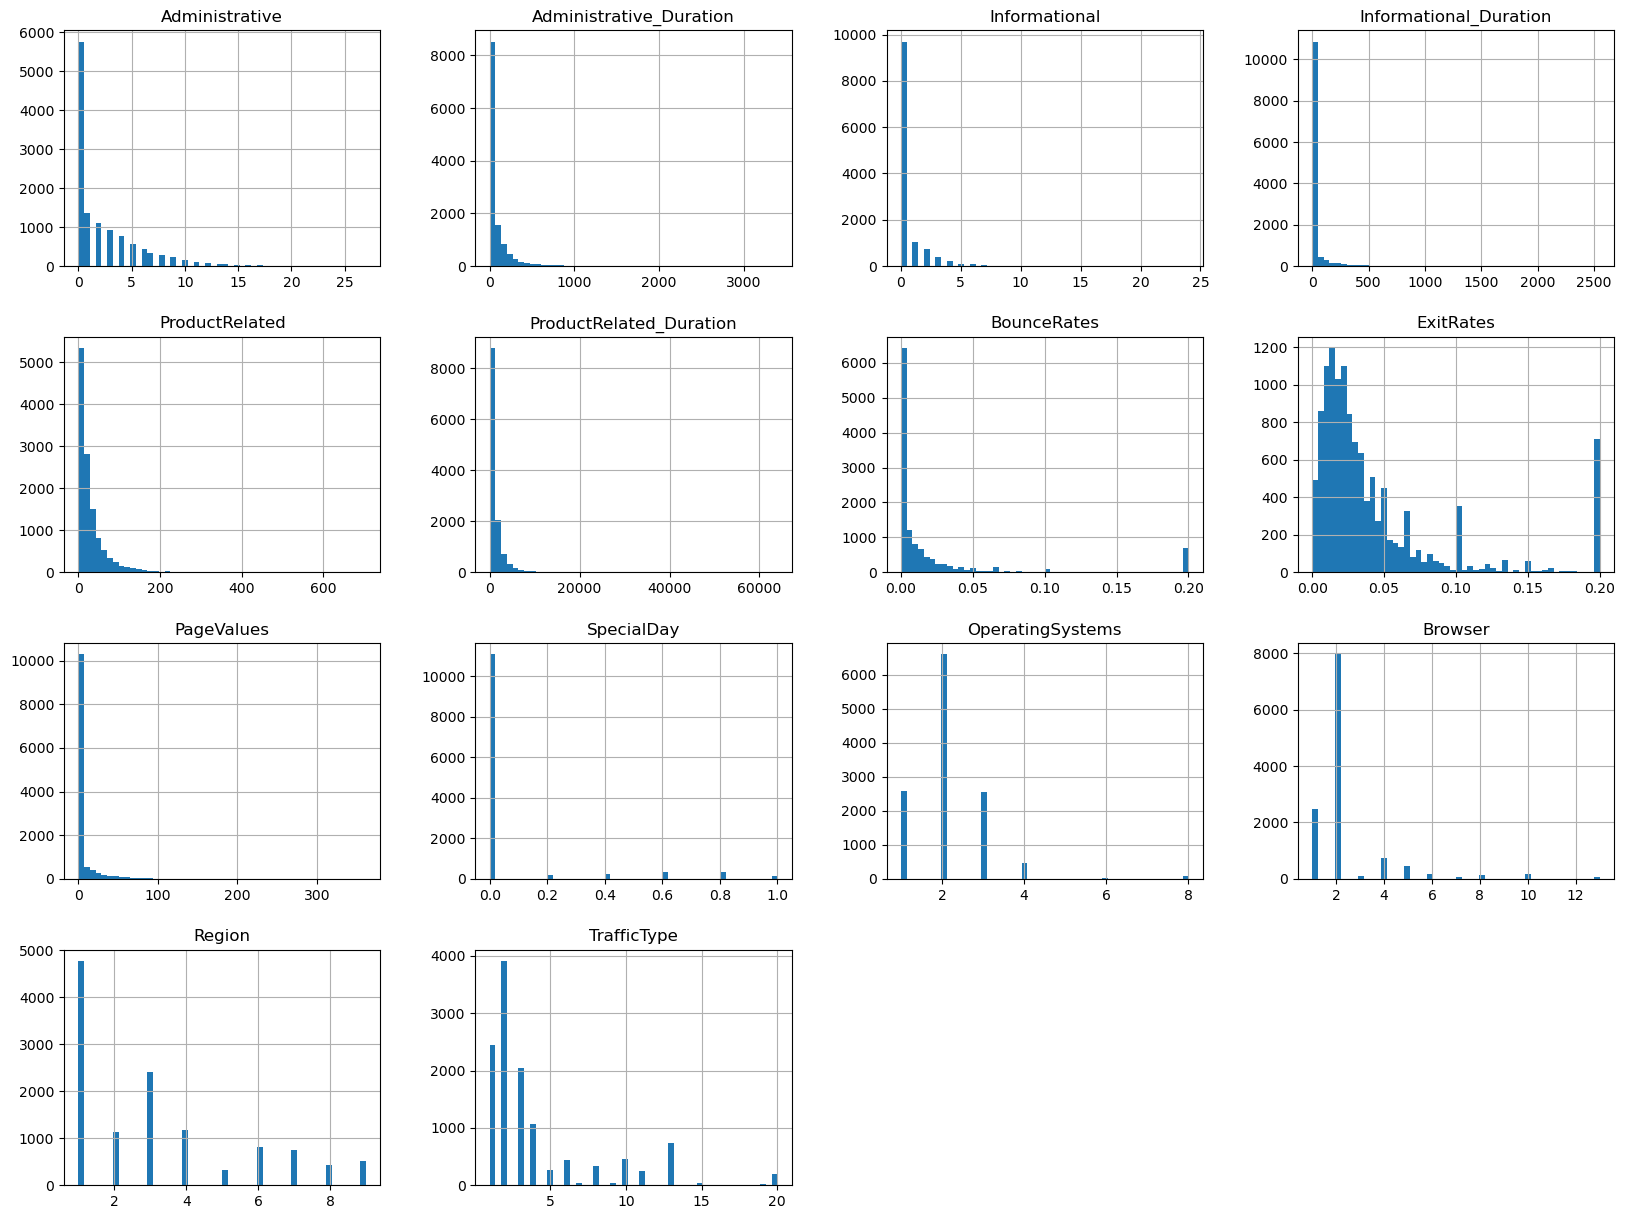

In [101]:
df.hist(bins=50,figsize=(20,15))
plt.show()

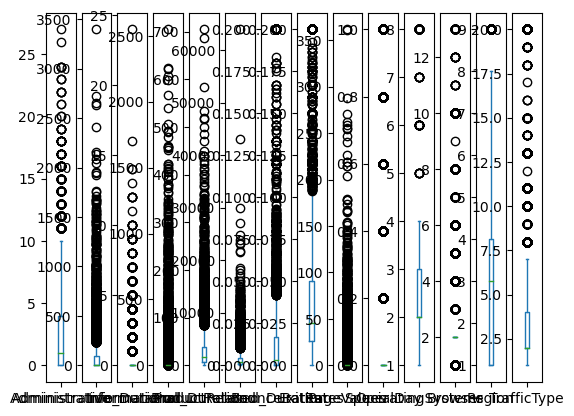

In [116]:
#df.plot(kind='box', subplots=True)
#plt.show()

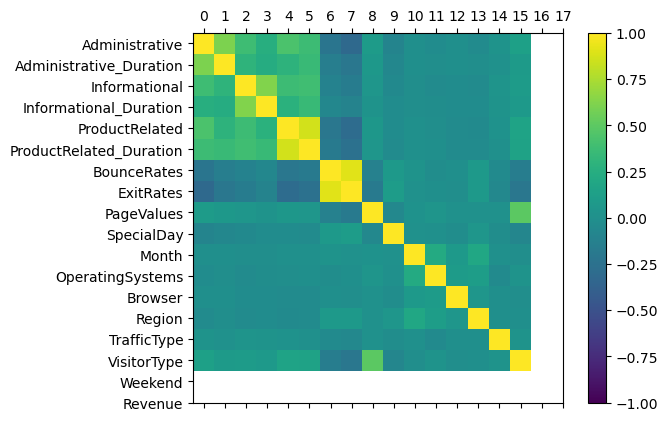

In [122]:
correlations = df.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,18,1)
names= df.head(0)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_yticklabels(names)
plt.show()

## Modeling